In [4]:
import torch
import numpy as np
import json
from lime import lime_image
from numba.cpython.slicing import slice_constructor_impl
from skimage.segmentation import quickshift, mark_boundaries, slic
from ultralytics import YOLO
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

In [5]:

def transform_image(image):
    """Ensure image is in RGB format."""
    if image.mode != "RGB":
        image = image.convert("RGB")
    return np.array(image)


def yolo_predict(image_np, model):
    """Performs YOLO inference and returns object detection results."""
    if image_np.shape[-1] != 3:
        raise ValueError("Expected an RGB image with shape (H, W, 3)")

    image_pil = Image.fromarray(image_np.astype(np.uint8))  # Ensure proper dtype
    results = model(image_pil)

    if len(results[0].boxes) > 0:
        boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        classes = results[0].boxes.cls.cpu().numpy()  # Class IDs
        scores = results[0].boxes.conf.cpu().numpy()  # Confidence scores
        return boxes, classes, scores
    else:
        return [], [], []  # No detections


def surrogate_classifier(images_np, model):
    """Generate a surrogate classifier's output based on detected objects."""
    outputs = []
    for image_np in images_np:
        try:
            boxes, classes, scores = yolo_predict(image_np, model)
            output = np.zeros(len(model.names))  # Initialize output for all classes
            for class_id, score in zip(classes, scores):
                output[int(class_id)] = score  # Assign confidence scores to detected classes
            outputs.append(output)
        except Exception as e:
            print(f"Error processing image: {e}")
            outputs.append(np.zeros(len(model.names)))  # Return zero scores if error
    return np.array(outputs)


Processing image 26


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 91.6ms
Speed: 1.5ms preprocess, 91.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.8ms
Speed: 1.0ms preprocess, 89.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 91.0ms
Speed: 1.1ms preprocess, 91.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.4ms
Speed: 1.1ms preprocess, 91.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.0ms
Speed: 1.1ms preprocess, 92.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.9ms
Speed: 2.0ms preprocess, 97.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.8ms
Speed: 1.1ms preprocess, 96.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.0ms
Speed: 1.2ms preprocess, 93.0ms in

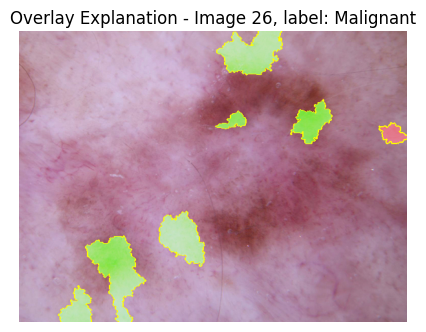

Processing image 30


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 87.4ms
Speed: 1.2ms preprocess, 87.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.7ms
Speed: 1.0ms preprocess, 84.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 85.0ms
Speed: 1.0ms preprocess, 85.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.7ms
Speed: 1.8ms preprocess, 90.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 87.0ms
Speed: 1.8ms preprocess, 87.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 88.3ms
Speed: 1.9ms preprocess, 88.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 86.7ms
Speed: 1.9ms preprocess, 86.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 83.2ms
Speed: 1.1ms preprocess, 83.2ms inference, 0.4ms pos

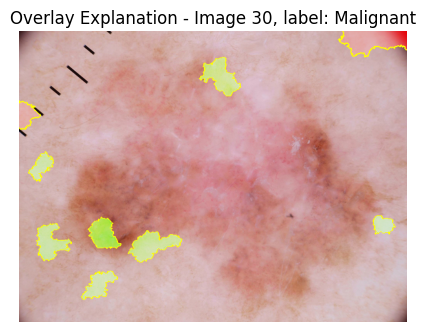

Processing image 36


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 88.8ms
Speed: 1.2ms preprocess, 88.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 89.1ms
Speed: 1.0ms preprocess, 89.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 96.1ms
Speed: 1.2ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 94.0ms
Speed: 1.1ms preprocess, 94.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.7ms
Speed: 1.2ms preprocess, 89.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 103.1ms
Speed: 2.1ms preprocess, 103.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 109.4ms
Speed: 2.1ms preprocess, 109.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.9ms
Speed: 1.1ms preprocess, 91.9ms inference

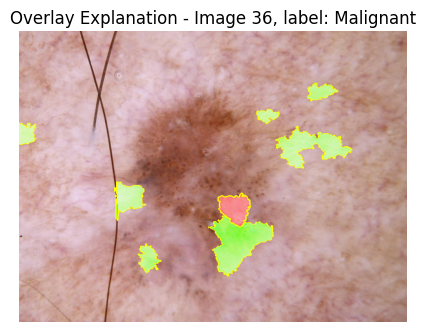

Processing image 38


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 93.4ms
Speed: 1.5ms preprocess, 93.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.5ms
Speed: 1.1ms preprocess, 90.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.1ms
Speed: 1.0ms preprocess, 91.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.1ms
Speed: 1.4ms preprocess, 89.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 95.9ms
Speed: 1.0ms preprocess, 95.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.3ms
Speed: 1.0ms preprocess, 90.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.9ms
Speed: 1.1ms preprocess, 92.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.9ms
Speed: 1.1ms preprocess, 92.9ms in

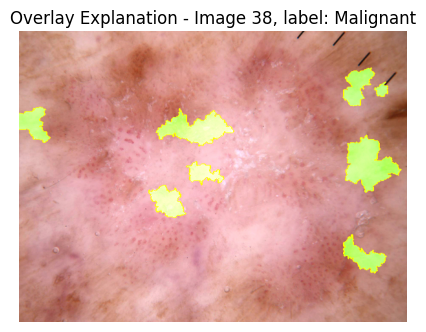

Processing image 54


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 96.1ms
Speed: 1.3ms preprocess, 96.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.7ms
Speed: 1.1ms preprocess, 93.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.8ms
Speed: 1.1ms preprocess, 96.8ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.4ms
Speed: 1.9ms preprocess, 96.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 98.5ms
Speed: 1.2ms preprocess, 98.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 98.5ms
Speed: 1.1ms preprocess, 98.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.0ms
Speed: 1.6ms preprocess, 92.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.9ms
Speed: 2.0ms preprocess, 93

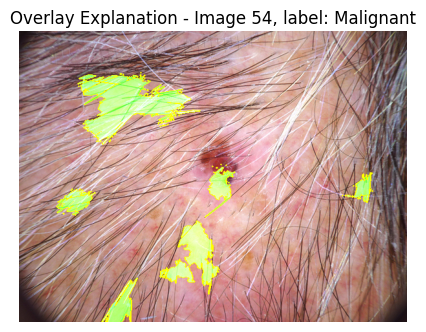

Processing image 88


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 99.0ms
Speed: 1.6ms preprocess, 99.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.9ms
Speed: 1.7ms preprocess, 89.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.5ms
Speed: 1.0ms preprocess, 91.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 98.4ms
Speed: 1.1ms preprocess, 98.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.0ms
Speed: 2.1ms preprocess, 97.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.7ms
Speed: 2.2ms preprocess, 96.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 99.0ms
Speed: 1.9ms preprocess, 99.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 102.8ms
Speed: 2.1ms preprocess, 1

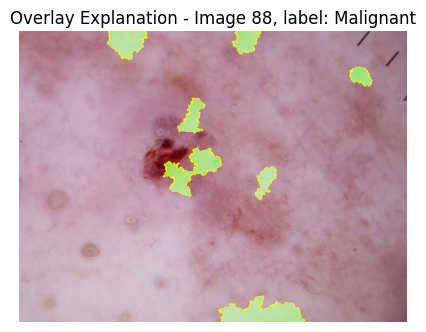

Processing image 105


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 91.8ms
Speed: 1.3ms preprocess, 91.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 91.3ms
Speed: 1.1ms preprocess, 91.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.6ms
Speed: 1.0ms preprocess, 100.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.1ms
Speed: 1.0ms preprocess, 93.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.3ms
Speed: 1.1ms preprocess, 92.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.4ms
Speed: 1.1ms preprocess, 92.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 93.4ms
Speed: 1.1ms preprocess, 93.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.8ms
Speed: 1.0ms preprocess, 94.8ms inference, 

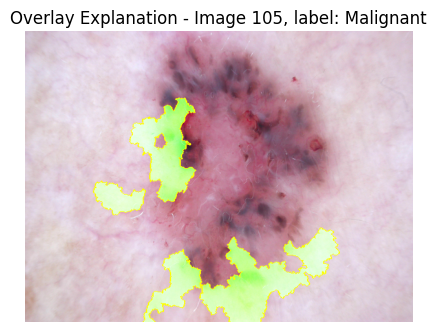

Processing image 109


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 93.6ms
Speed: 1.3ms preprocess, 93.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.1ms
Speed: 1.8ms preprocess, 94.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.4ms
Speed: 1.8ms preprocess, 91.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 95.3ms
Speed: 1.1ms preprocess, 95.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.5ms
Speed: 2.3ms preprocess, 93.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.4ms
Speed: 1.9ms preprocess, 97.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.5ms
Speed: 1.3ms preprocess, 97.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.0ms
Speed: 1.1ms preprocess, 94.0ms infer

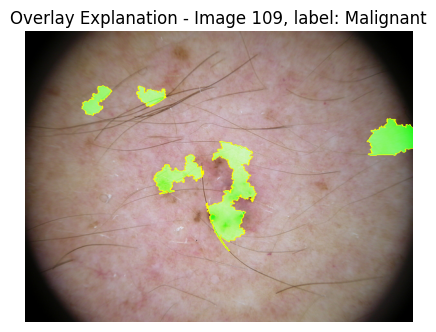

Processing image 115


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 84.8ms
Speed: 1.3ms preprocess, 84.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.7ms
Speed: 1.1ms preprocess, 83.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.4ms
Speed: 1.1ms preprocess, 90.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.0ms
Speed: 1.1ms preprocess, 89.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.9ms
Speed: 1.9ms preprocess, 85.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.8ms
Speed: 1.9ms preprocess, 90.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.6ms
Speed: 1.9ms preprocess, 85.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 85.8ms
Speed: 1.1ms preprocess, 85.8ms inference, 0.5m

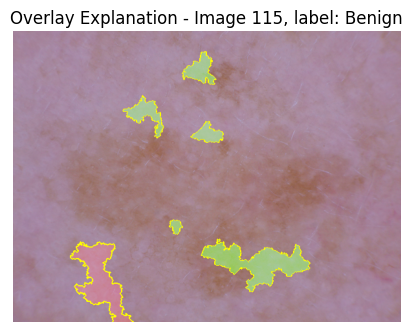

Processing image 118


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 86.6ms
Speed: 1.9ms preprocess, 86.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 86.3ms
Speed: 1.9ms preprocess, 86.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.1ms
Speed: 1.0ms preprocess, 85.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.0ms
Speed: 1.0ms preprocess, 84.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.6ms
Speed: 1.1ms preprocess, 84.6ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.5ms
Speed: 1.1ms preprocess, 84.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.5ms
Speed: 1.1ms preprocess, 84.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.3ms
Speed: 1.1ms preprocess, 83.3ms inferenc

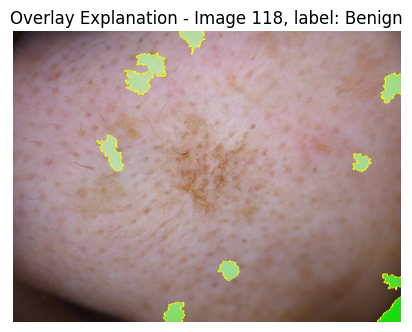

Done


In [6]:

label_mapping = {
    "melanoma": "Malignant",
    "melanocytic_Nevi": "Malignant",
    "dermatofibroma": "Benign",
    "basal_cell_carcinoma": "Malignant",
    "vascular_lesions": "Benign",
    "actinic_keratoses": "Malignant",
    "benign_keratosis-like_lesions": "Benign"
}
# Load the dataset
dataset = load_dataset("marmal88/skin_cancer")
test_split = dataset["test"]

# Load the YOLO model
model = YOLO("yolo_weights/yolov8SC.pt")  # Replace with your model path

true_positives = [25, 29, 35, 37, 53, 87, 104, 108, 114, 117]
# Process and explain 10 images
for index in true_positives:
    print(f"Processing image {index + 1}")
    image = test_split[index]["image"]
    ground_truth = test_split[index]["dx"]
    truth = label_mapping[ground_truth]

    # Transform image for SODEx
    image_np = transform_image(image)

    # Initialize LIME explainer
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        image_np,
        lambda x: surrogate_classifier(x, model),
        top_labels=2,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=lambda x: quickshift(x, kernel_size=4, max_dist=200)
        # segmentation_fn=lambda x: slic(x, n_segments=50, compactness=10)
    )

    # Get explanation mask
    image_explained, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False
    )
    image_explained2, mask2 = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False
    )

    # Overlay the explanation mask onto the original image
    overlay = mark_boundaries(image_explained2, mask2)

    # Plot only the overlay explanation
    plt.figure(figsize=(5, 5))
    plt.imshow(overlay)
    plt.title(f"Overlay Explanation - Image {index + 1}, label: {truth}")
    plt.axis("off")
    plt.savefig(f"results_lime/overlay_{index}.png")
    plt.show()
print("Done")